# Bank Account Fraud Detection using Logistic Regression and XGBoost

**Date**: 9 February 2026 - 15 February 2026 \
**Author**: Li Zhaozhi (李兆智)

---

**Background**: Fraud is a type of financial crime risk that poses threats to customers and banks. There're multiple typologies within fraud such as authorised and unauthorised digital, payment, credit card, application fraud, and scams, etc. Financial institutions deploy data science capabilities to analyse fraud patterns, detect, and mitigate fraud risk. Banking data include transaction data, customer profile data, credit data, behavioural data, and device metadata, etc.

**Application Fraud**: in the form of bank account opening refers to the deliberate submission of false, forged, or stolen information during the account opening process with the intent to:

- Obtain financial products/services under false pretenses
- Facilitate money laundering or other financial crimes
- Circumvent regulatory controls and due diligence requirements
- Create vehicles for future illicit activities

(Reference: Association of Certified Anti-Money Laundering Specialists (ACAMS))

**Objective**: This solution discerns patterns and detects application fraud in the form of bank account opening by applying statistical analysis, data visualisation, hypothesis testing, and machine learning techniques to analyse and model bank account data whilst meeting the challenges stated below.

**Challenges**: Financial institutions face the following challenges in fraud detection:

- *False positive*: Genuine customers/transactions flagged as fraudulent leading to increased investigation expenses.
- *False negative*: Failure to detect fraudulent customers/transactions leading to financial loss and reputational damage, sometimes regulatory fines.
- *Class imblance*: Fraud data is typically imbalanced which requires processing before modelling.

**Methodologies**: Model governance prioritises explainability in highly regulated industries such as financial services. This solution uses Logistic Regression and XGBoost to achieve the above objective. Details of model selection are available in this notebook under the *Model Selection* section.


**Table of Contents**:

- [BFA-Fraud-Detection-Models](https://github.com/mrlizhaozhi/application-fraud-bank-account-opening/blob/main/BAF-Fraud-Detection-Model.ipynb): Complete Python code for model development.
- [BFA-Fraud-Detection-Documentation](https://github.com/mrlizhaozhi/application-fraud-bank-account-opening/blob/main/BAF-Fraud-Detection-Documentation.md): Model Risk Management and Model Governance documentation to meet regulatory reporting requirements.
- [BFA-Fraud-Detection-Dashboard](https://public.tableau.com/app/profile/lizhaozhi/viz/BAF-Fraud-Detection-Dashboard/Sheet1): Interactive dashboards and visual stories to present analytical findings from the dataset.
- [BFA-Fraud-Detection-Presentation](https://github.com/mrlizhaozhi/application-fraud-bank-account-opening/blob/main/BAF-Fraud-Detection-Presentation.pptx): Present analytical findings and the modelling process.

**Tags: Fraud Detection, Descriptive Statistics, Data Visualisation, Chi-Square Hypothesis Testing, Logistic Regression, XGBoost**


## Data Sets and Definitions

**Data Sets**: [Feedzai](https://research.feedzai.com) is an AI fraud detection platform that uses machine learning to detect fraud. Feedzai Research released anonymised [Bank Account Fraud](https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022/data) data sets at NeurIPS 2022. These data sets are available in downloadable CSV format. This analysis uses the `base` dataset.

References:

- [Bank Account Fraud Dataset Suite Datasheet](https://github.com/feedzai/bank-account-fraud/blob/main/documents/datasheet.pdf)

Data definitions:

| Num | Variable | Definition | Data Type | Unit | Example |
|--|----------|------------|-----------|------|---------|
|1|fraud_bool|Fraud label (1: Fraud, 0: geunine)|Numerical|N/A|1|
|2|income|Annual income in quantiles|Numerical|N/A|0.3|
|3|name_email_similarity|Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges between [0, 1].|Numerical|N/A|1|
|4|prev_address_months_count| Number of months in previous registered address of the applicant, i.e. the applicant’s previous residence, if applicable. Ranges between [−1, 380] months (-1 is a missing value).|Numerical|Month|2|
|5| current_address_months_count | Months in currently registered address of the applicant. Ranges between [−1, 406] months (-1 is a missing value). |Numerical|Month|100|
|6| customer_age | Applicant’s age in bins per decade (e.g, 20-29 is represented as 20). |Numerical|N/A|30|
|7|days_since_request|Number of days passed since application was done. Ranges between [0, 78] days.|Numerical|Day|12|
|8|intended_balcon_amount|Initial transferred amount for application. Ranges between [−1, 108]. Negatives are missing values.|Numerical|USD|100|
|9|payment_type|Credit payment plan type. 5 possible (annonymized) values.|Categorical|N/A|AD|
|10|zip_count_4w|Number of applications within same zip code in last 4 weeks. Ranges between [1, 5767].|Numerical|App|21|
|11|velocity_6h|Velocity of total applications made in last 6 hours i.e., average number of applications per hour in the last 6 hours. Ranges between [−211, 24763].|Numerical|App|12|
|12|velocity_24h|Velocity of total applications made in last 24 hours i.e., average number of applications per hour in the last 24 hours. Ranges between [1329, 9527].|Numerical|App|1400|
|13|velocity_4w| Velocity of total applications made in last 4 weeks, i.e., average number of applications per hour in the last 4 weeks. Ranges between [2779, 7043].|Numerical|App|2779|
|14|bank_branch_count_8w| Number of total applications in the selected bank branch in last 8 weeks. Ranges between [0, 2521].|Numerical|App|12|
|15|date_of_birth_distinct_emails_4w|Number of emails for applicants with same date of birth in last 4 weeks. Ranges between [0, 42].|Numerical|Emails|12|
|16|employment_status|Employment status of the applicant. 7 possible (annonymized) values.|Categorical|N/A|CA|
|17|credit_risk_score|Internal score of application risk. Ranges between [−176, 387].|Numerical|N/A|-100|
|18|email_is_free|Domain of application email (either free or paid).|Numerical|N/A|1|
|19|housing_status|Current residential status for applicant. 7 possible (annonymized) values.|Categorical|N/A|BC|
|20|phone_home_valid|Validity of provided home phone.|Numerical|N/A|1|
|21|phone_mobile_valid|Validity of provided mobile phone.|Numerical|N/A|1|
|22|bank_months_count|How old is previous account (if held) in months. Ranges between [−1, 31] months (-1 is a missing value).|Numerical|Month|1|
|23|has_other_cards|If applicant has other cards from the same banking company.|Numerical|N/A|1|
|24|proposed_credit_limit|Applicant’s proposed credit limit. Ranges between [200, 2000].|Numerical|USD|200|
|25|foreign_request|If origin country of request is different from bank’s country.|Numerical|N/A||
|26|source|Online source of application. Either browser(INTERNET) or mobile app (APP).|Categorical|N/A|Internet|
|27|session_length_in_minutes|Length of user session in banking website in minutes. Ranges between [−1, 107] minutes. (-1 is missing value)|Numerical|Minutes|12|
|28|device_os|Operative system of device that made request. Possible values are: Windows, Macintox, Linux, X11, or other.|Categorical|N/A|Windows|
|29|keep_alive_session|User option on session logout.|Numerical|N/A|1|
|30|device_distinct_emails_8w|Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [0, 3].(-1 is missing value)|Numerical|Emails|2|
|31|device_fraud_count|Number of fraudulent applications with used device. Ranges between [0, 1].|Numerical|N/A|0|
|32|month|Month where the application was made. Ranges between [0, 7].|Numerical|Month|2|

## Exploratory data analysis (EDA)
Exploratory data analysis (EDA) involves reading in and making sense of the original data. Descriptive statistics, data visualisations, and hypothesis testing are used to explore this data. This notebook includes all the code, guiding research questions, and comments on analytical findings.

This EDA consists of the following sections:

1. Data quality assessment
2. Statistical analysis
3. Missing values analysis
4. Univariate analysis

In [94]:
# import required libraries - basics
import numpy as np
import pandas as pd

# Hypothesis testing packages
from scipy.stats import chi2_contingency

# logistic regression packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# xgboost packages
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV

# import pickle to export production-ready, trained models.
import pickle

# data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns

### Part 1. Data quality assessment

Data quality assessment focuses on 1) making sure that the original data is correctly imported from sources, 2) gaining an overall understanding of the different variables including data types, duplicates, and missing values.

In [2]:
# display all columns in this notebook
pd.set_option('display.max_columns', None) 

# set file paths and import raw data, check import status
base_original = pd.read_csv(r"D:\我的文檔\數據分析專案集\Feedzai Bank Account Fraud Dataset\Feedzai Bank Account Fraud Dataset\Base.csv")
base_original.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,7850.955007,6742.080561,5,5,CB,163,1,BC,0,1,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,5745.251481,5941.664859,3,18,CA,154,1,BC,1,1,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,5471.988958,5992.555113,15,11,CA,89,1,BC,0,1,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,6755.344479,5970.336831,11,13,CA,90,1,BC,0,1,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,5124.046930,5940.734212,1,6,CA,91,0,BC,1,1,26,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [3]:
base_original.tail()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,6732.602414,3010.048099,3095.754245,42,8,CA,305,1,BB,1,1,31,0,1500.0,0,INTERNET,16.967770,other,0,1,0,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,1574.293294,2716.495767,4286.089050,0,5,CA,235,0,BA,1,1,-1,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,1258.864938,3601.322892,3103.891664,2,3,CA,195,1,BE,0,1,31,0,200.0,0,INTERNET,16.068595,other,0,1,0,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,7048.137128,6521.395012,3068.265084,7,8,CA,148,0,BD,0,1,1,0,200.0,0,INTERNET,1.378683,linux,1,1,0,7
999999,0,0.6,0.993391,-1,174,30,0.020422,14.942456,AA,655,3737.076479,3135.788094,3051.003293,14,8,CA,100,1,BB,0,1,15,1,200.0,0,INTERNET,1.947926,other,1,1,0,7


In [4]:
# Check the shape of the data set (number of rows and columns)
base_original.shape

(1000000, 32)

In [5]:
# check variable names and data types
base_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

**Comments**

**Q: How many observations and variables are there in this data set?**

This dataset contains 1,000,000 observations and 32 variables.

**Q: How many variables are numerical and categorical respectively?**

Out of the 32 variables, 27 variables are numerical, 5 variables are categorical. Feature transformation converting these categorical variables into numerical values will be required if these 5 variables are selected. 

**Q: What are the dimensions of these variables in the context of financial crime risk fraud analytics?**

- Financial data: `income`, `intended_balcon_amount`
- Credit data: `credit_risk_score`, `proposed_credit_limit`
- Digital metadata: `device_os`, `device_fraud_count`
- Profile data: `name_email_similarity`, `customer_age`, `bank_months_count`, `phone_mobile_valid`, `phone_home_valid`, `email_is_free`, `employment_status`, `housing_status`, `days_since_request`, `zip_count_4w`
- Behavioural data: `session_length_in_minutes`, `keep_alive_session`, `foreign_request`, `velocity_6h`, `velocity_24h`, `velocity_4w`, `prev_address_months_count`, `current_address_month_count`, `source`, `bank_branch_count_8w`, `date_of_birth_distinct_mails_4w`, `device_distinct_emails_8w`
- Datetime data: `month`

In [6]:
# Check if there're missing values in the dataframe.
base_original.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [7]:
# Check if there're missing values in the data set (-1 denotes missing values)
missing_values_mask = base_original[['prev_address_months_count','current_address_months_count','bank_months_count', 'intended_balcon_amount', 'device_distinct_emails_8w','session_length_in_minutes']] < 0
missing_values = {}
for column, flag in missing_values_mask.items():
    missing_values[column] = flag.sum()
missing_values

{'prev_address_months_count': np.int64(712920),
 'current_address_months_count': np.int64(4254),
 'bank_months_count': np.int64(253635),
 'intended_balcon_amount': np.int64(742523),
 'device_distinct_emails_8w': np.int64(359),
 'session_length_in_minutes': np.int64(2015)}

**Comments**: 

**Q: Does this data set contain any missing values?**

Yes. Although the data frame has no missing value, according to data definitions, columns `prev_address_months_count`, `current_address_months_count`,  `bank_months_count`, `intended_balcon_balance`, `device_distinct_emails_8w`, and `session_length_in_minutes` have missing values.

**Q: How to deal with missing values in bank account opening?**

Fraudsters may intentionally omit data when applying for bank accounts. Missing data can be indicators of fraud. Therefore, it's worthwhile to investigate the legitimacy and correlation with fraud of these missing values before processing.

In [8]:
# Check if the data is unique or duplicated
base_original.duplicated().sum()

np.int64(0)

In [9]:
# get the number of unique values per variable
base_original.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

**Comment**:

There're no row duplicates in this data set. All line records are unique combinations of variables.

### Part 2. Statistical analysis

Statistical analysis provides summary statistics of numeric and categorical variables to make sense of the data. This serves as the starting point of univariate and multivariate analyses of the data.

In [10]:
# get descriptive statistics of the numerical variables
base_original.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,4856.324016,184.361849,9.503544,130.989595,0.529886,0.417077,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,919.843934,459.625329,5.033792,69.681812,0.499106,0.493076,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,2825.748405,0.000000,0.000000,-170.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,4268.368423,1.000000,6.000000,83.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,4913.436941,9.000000,9.000000,122.000000,1.000000,0.000000,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,5488.083356,25.000000,13.000000,178.000000,1.000000,1.000000,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,6994.764201,2385.000000,39.000000,389.000000,1.000000,1.000000,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


**Comment**:

**Q: Are there obnormal observations from statistics?**

- `name_email_similarity` has a minimum of 0.000001 which represents a significant variance between the account owner's name and email address which may indicate impersonation risk or synthetic identities.

- `credit_risk_score` and high `proposed_credit_limit` are high risk indicators of fraud. Fraudsters may look for higher credit limits to transfer illicit funds.

- Invalid `phone_home_valid` and `phone_mobile_valid` leading to challenges in contacting customers to verify identity.

- `customer_age` has a maximum of 90. It's worthwhile to consider the possibility of elderly abuse.

- `device_fraud_count` have 0's across all observations and have little contributing value to predictive modelling. This variable can be dropped from the data set to save compute resources.


In [11]:
# get descriptive statistics of the categorical variables
base_original[['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']].describe()

,payment_type,employment_status,housing_status,source,device_os
count,1000000,1000000,1000000,1000000,1000000
unique,5,7,7,2,5
top,AB,CA,BC,INTERNET,other
freq,370554,730252,372143,992952,342728


**Comment**:

`employment_status` and `housing_status` could be risk indictors. Unemployeed individuals may commit crimes for income.

In [12]:
# check if there is class imbalance.
base_original['fraud_bool'].value_counts(normalize=True) * 100

fraud_bool
0    98.8971
1     1.1029
Name: proportion, dtype: float64

**Comments**:

**Q: Does this data have a class imbalance issue?**

Yes. There're 988,971 (99%) genuine records and 11,029 (1%) fraudulent records. This represents a class imbalance issue that merits further processing before predictive modelling.

**Q: Are there concerns on predictive modelling?**

Yes. The class imbalance issue could lead to 1) bias towards the majority, 2) poor decision boundary, and 3) inflated accuracy issues when building models. ROC-AUC, recall, and FPR shall be used for thresholding the models instead.

### Part 3. Missing values analysis

Given fraudsters may intentionally omit data when applying for bank accounts, missingness is an indicator of fraud risk. This section of the EDA assesses whether missing values are correlated with fraud.

**Q: Are the missing values correlated with fraud?**

In [13]:
# Label missing values: convert -1 into 1 to flag missing values; rest as 0.
# Create new binary features to check whether there are missing data.
columns_missing = ['prev_address_months_count','current_address_months_count','bank_months_count', 'device_distinct_emails_8w', 'intended_balcon_amount','session_length_in_minutes']
for column in columns_missing:
    base_original[f'{column}_missing'] = (base_original[column] < 0).astype(int)
columns_missing_labelled = ['prev_address_months_count_missing', 'intended_balcon_amount_missing', 'current_address_months_count_missing','bank_months_count_missing','device_distinct_emails_8w_missing','session_length_in_minutes_missing']

In [96]:
# Visualise missing values vs fraud
missing_fraud = (base_original.groupby('fraud_bool')[columns_missing_labelled].mean() * 100).reset_index()
missing_fraud = missing_fraud.melt(id_vars='fraud_bool', var_name='variables', value_name='missing_rate')
missing_fraud

,fraud_bool,variables,missing_rate
0,0,prev_address_months_count_missing,71.062347
1,1,prev_address_months_count_missing,91.885030
2,0,intended_balcon_amount_missing,74.094791
3,1,intended_balcon_amount_missing,88.376099
4,0,current_address_months_count_missing,0.428728
5,1,current_address_months_count_missing,0.126938
6,0,bank_months_count_missing,25.227737
7,1,bank_months_count_missing,37.537401
8,0,device_distinct_emails_8w_missing,0.035896
9,1,device_distinct_emails_8w_missing,0.036268


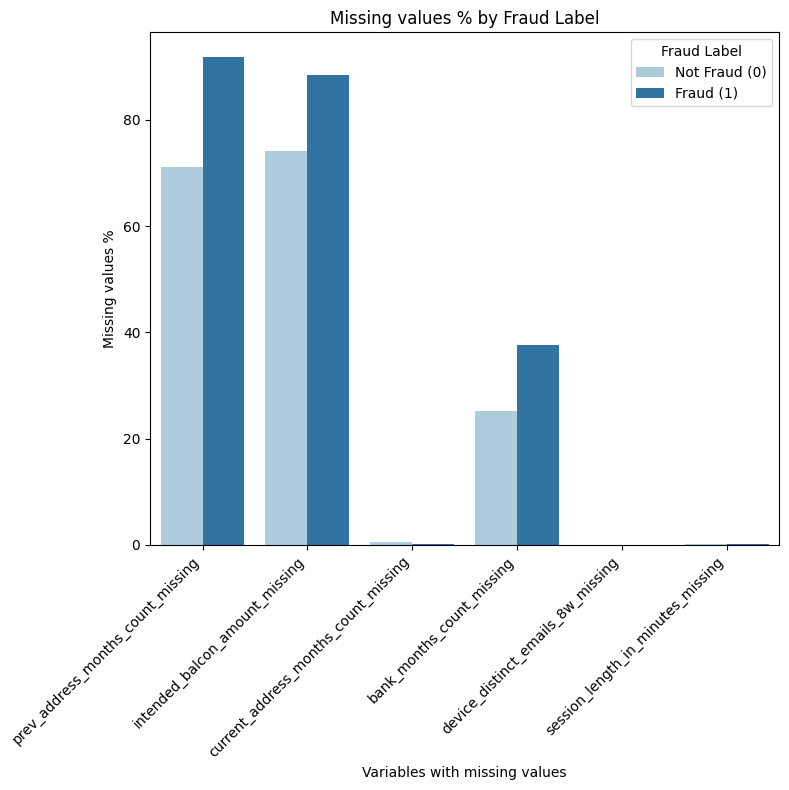

In [97]:
# set plot size
plt.figure(figsize=(8,8))

# construct a barplot to visualise missing rate by fraud outcome per variable
ax = sns.barplot(
    data=missing_fraud,
    x='variables',
    y='missing_rate',
    hue='fraud_bool',
    palette=sns.color_palette('Paired',2)
)

# reformat plot elements to enhance readability
plt.xticks(rotation=45, ha='right')
plt.title('Missing values % by Fraud Label')
plt.xlabel('Variables with missing values')
plt.ylabel('Missing values %')

# reformat the legends
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=handles,
    labels=['Not Fraud (0)', 'Fraud (1)'],
    title='Fraud Label'
)

# display the barplot.
plt.tight_layout()
plt.show()

**Comment**:

From the barplot above, Fraud accounts have higher missing value percentages than Not Fraud in `prev_address_months_count`, `intended_balcon_amount` and `bank_months_count` variables.

In [16]:
# Check the relationship between missing values and fraud rate
for column in columns_missing_labelled:

    # group by variables, get fraud rate by data availability
    summary = (
        base_original.groupby(column)['fraud_bool']
            .agg(['count','mean'])
            .rename(columns={'mean': 'fraud_rate'})
    )
    print('\n- - - - - -\n')
    print(summary)

# get the baseline fraud rate for comparison
print(f'\n Baseline fraud rate: {base_original['fraud_bool'].mean()}')


- - - - - -

                                    count  fraud_rate
prev_address_months_count_missing                    
0                                  287080    0.003118
1                                  712920    0.014215

- - - - - -

                                 count  fraud_rate
intended_balcon_amount_missing                    
0                               257477    0.004979
1                               742523    0.013127

- - - - - -

                                       count  fraud_rate
current_address_months_count_missing                    
0                                     995746    0.011062
1                                       4254    0.003291

- - - - - -

                            count  fraud_rate
bank_months_count_missing                    
0                          746365    0.009230
1                          253635    0.016323

- - - - - -

                                    count  fraud_rate
device_distinct_emails_8w_missing           

**Comments**:

Missing values in `prev_address_months_count`, `bank_months_count`, `intended_balcon_amount`, and `device_distinct_emails_8w` are correlated with fraud.

**Conduct Chi-square test of independence to assess statistical significance**

$\text{H}_0$: Missing values in `prev_address_months_count`, `bank_months_count`, `intended_balcon_amount`, and `device_distinct_emails_8` are independent of fraud outcome.

$\text{H}_1$: Missing values in `prev_address_months_count`, `bank_months_count`, `intended_balcon_amount`, and `device_distinct_emails_8` are not independent of fraud outcome.

In [17]:
# Perform chi-square test to validate meaningfulness.
for column in columns_missing_labelled:
    
    contingency = pd.crosstab(base_original[column], base_original['fraud_bool'])
    chi2, p, dof, expected = chi2_contingency(contingency)

    # calculate the Phi coefficients to evaluate practical significance given the sample size is huge.
    n = contingency.sum().sum()
    phi = np.sqrt(chi2 / n) 

    # output the findings.
    print(f"{column}: \n chi-square = {chi2:.4f} \n p-value = {p:.4f} \n phi coefficient = {phi:.4f} \n sample size = {n} \n\n")

prev_address_months_count_missing: 
 chi-square = 2309.7136 
 p-value = 0.0000 
 phi coefficient = 0.0481 
 sample size = 1000000 


intended_balcon_amount_missing: 
 chi-square = 1162.8628 
 p-value = 0.0000 
 phi coefficient = 0.0341 
 sample size = 1000000 


current_address_months_count_missing: 
 chi-square = 22.7452 
 p-value = 0.0000 
 phi coefficient = 0.0048 
 sample size = 1000000 


bank_months_count_missing: 
 chi-square = 872.4251 
 p-value = 0.0000 
 phi coefficient = 0.0295 
 sample size = 1000000 


device_distinct_emails_8w_missing: 
 chi-square = 0.0000 
 p-value = 1.0000 
 phi coefficient = 0.0000 
 sample size = 1000000 


session_length_in_minutes_missing: 
 chi-square = 0.6321 
 p-value = 0.4266 
 phi coefficient = 0.0008 
 sample size = 1000000 




**Comment**: 

The p-values are smaller than 0.05. Assuming the null hypothesis is true, the probability of observing a chi-square statistic as extreme as, or more extreme than, the ones calculated is less than 0.05. Therefore, we reject the null hypothesis for the variables except for `device_distinct_emails_8w`. These variables have statistical significance. 

However, Chi-square is sensitive to sample size. The Phi coefficients are smaller than 0.05 which suggests these features alone have marginal predictive power and are more useful when used in combination with other features. Phi coefficient measures how strong their association is with fraud outcome, ranked from the highest to the lowest: `prev_address_months_count_missing` > `intended_balcon_amount_missing` > `bank_months_count_missing`.

### Part 4. Univariate analysis

Univariate analysis focuses on single variables covering both numeric and categorical variables. Some aspects to look at include distributions, correlations, and outliers.

#### 4.1 Numeric variables

**Q: Are there anomalies in numeric variables? Are these correlated with fraud outcome?**

In [18]:
# subset numeric variables
numeric_variables = ['income','name_email_similarity','prev_address_months_count','current_address_months_count','customer_age', 'days_since_request','intended_balcon_amount','zip_count_4w','velocity_6h','velocity_24h','velocity_4w','bank_branch_count_8w','date_of_birth_distinct_emails_4w','credit_risk_score','bank_months_count','proposed_credit_limit','session_length_in_minutes','device_distinct_emails_8w','month']
base_numeric_subset = base_original[['fraud_bool'] + numeric_variables]
print(len(numeric_variables))

19


In [19]:
base_numeric_subset.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,1059,13096.035018,7850.955007,6742.080561,5,5,163,9,1500.0,16.224843,1,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,1658,9223.283431,5745.251481,5941.664859,3,18,154,2,1500.0,3.363854,1,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1095,4471.472149,5471.988958,5992.555113,15,11,89,30,200.0,22.730559,1,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,3483,14431.993621,6755.344479,5970.336831,11,13,90,1,200.0,15.215816,1,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,2339,7601.511579,5124.046930,5940.734212,1,6,91,26,200.0,3.743048,1,0


In [20]:
base_numeric_subset.tail()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,device_distinct_emails_8w,month
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,530,6732.602414,3010.048099,3095.754245,42,8,305,31,1500.0,16.967770,1,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,408,1574.293294,2716.495767,4286.089050,0,5,235,-1,1000.0,1.504109,1,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,749,1258.864938,3601.322892,3103.891664,2,3,195,31,200.0,16.068595,1,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,707,7048.137128,6521.395012,3068.265084,7,8,148,1,200.0,1.378683,1,7
999999,0,0.6,0.993391,-1,174,30,0.020422,14.942456,655,3737.076479,3135.788094,3051.003293,14,8,100,15,200.0,1.947926,1,7


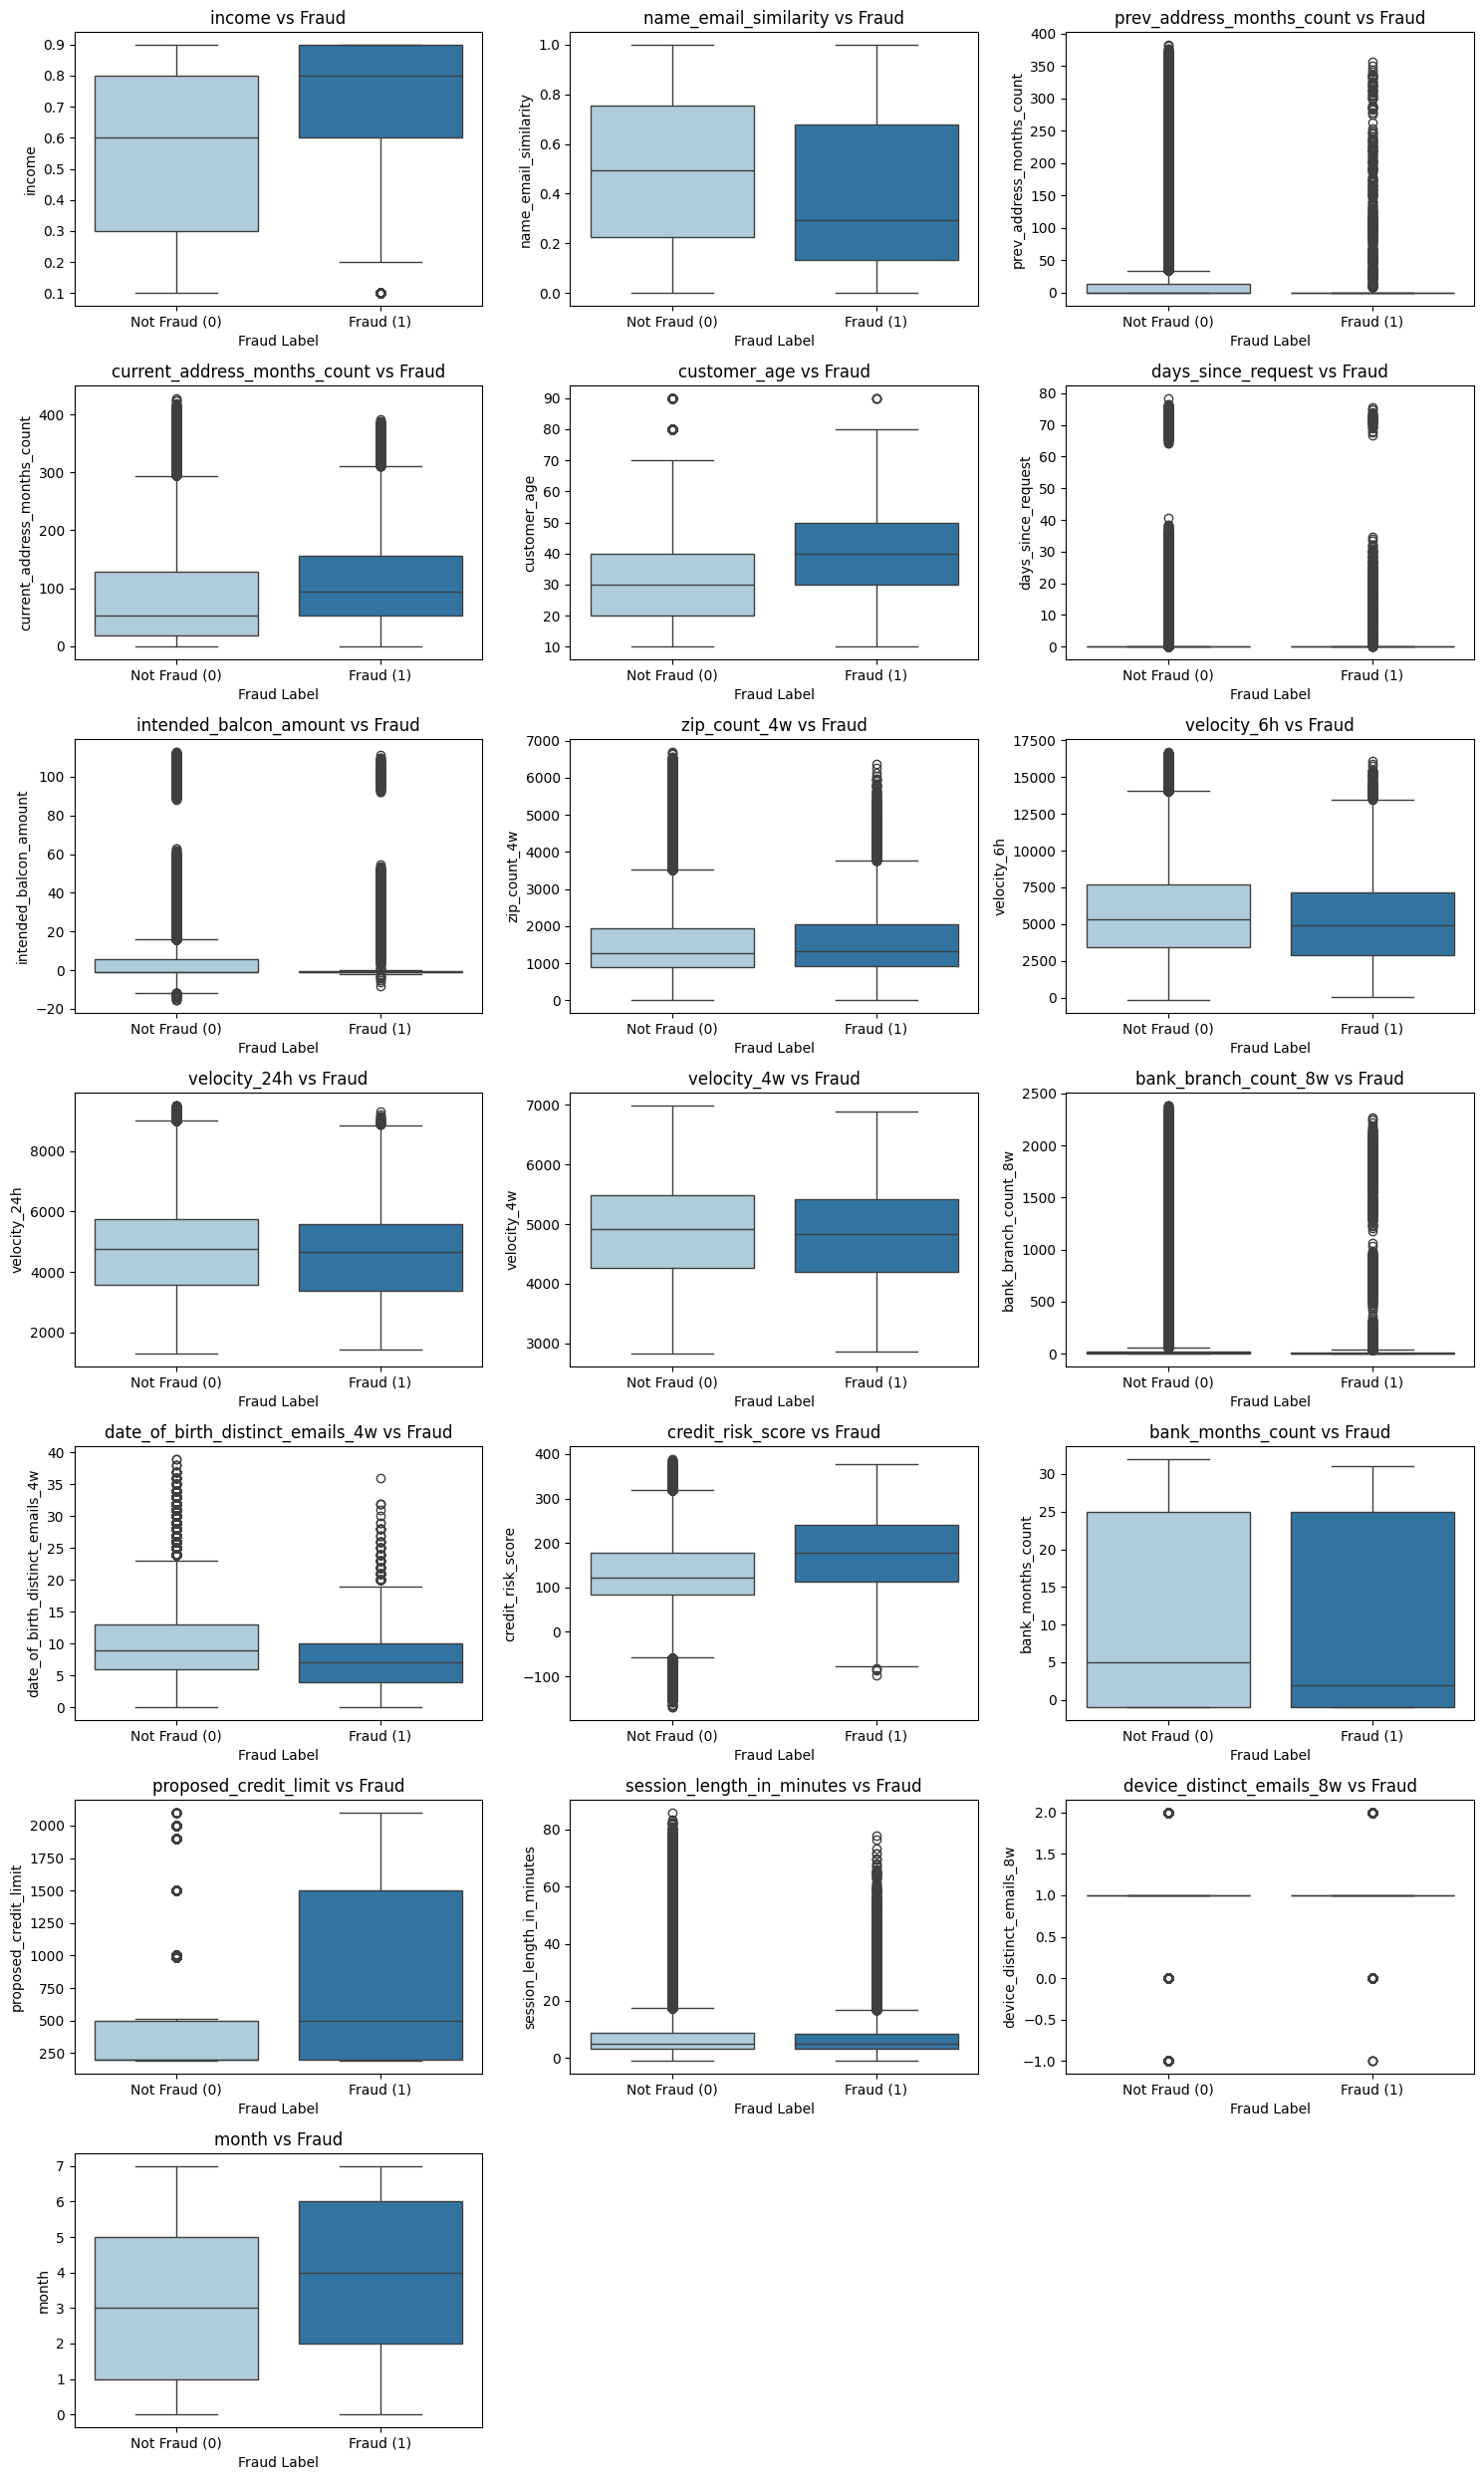

In [21]:
# create a boxplots to compare each numeric variable with fraud
fig, axes = plt.subplots(7, 3, figsize=(15,25))

# flatten axes
axes_flat = axes.flatten()

# loop through and plot data
for i, variable in enumerate(numeric_variables):
    sns.boxplot(data=base_numeric_subset, x='fraud_bool', y=variable, ax=axes_flat[i], 
                hue='fraud_bool', legend=False, palette=sns.color_palette("Paired",2))
    axes_flat[i].set_xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
    axes_flat[i].set_xlabel('Fraud Label')
    axes_flat[i].set_title(f'{variable} vs Fraud')

# hide empty plots
for ax in axes_flat[len(numeric_variables):]:
    ax.set_visible(False)

# display the boxplots
plt.tight_layout()
plt.show()

**Comment**:

- `income`: Fraudulent applications tend to report higher declared income, with an upward shift in median and upper quantiles. This suggests income may be inflated in fraudulent submissions rather than reflecting genuine earning capacity.

- `name_email_similarity`: Fraudulent applications exhibit substantially lower name–email similarity, indicating a mismatch between declared identity elements. This feature shows strong class separation and is likely to be highly informative for fraud detection models.

- `current_address_months_count`: Fraudulent accounts show a higher median tenure at the current address, consistent with the use of established or compromised identities rather than newly created profiles.

- `customer_age`: Fraudulent applications tend to be associated with older reported ages, which may reflect the exploitation of established or vulnerable identities rather than age itself being a causal risk factor.

- `credit_risk_score`: Fraudulent accounts tend to have less favourable credit risk profiles, with higher median risk scores and greater dispersion. This suggests credit-related attributes contribute meaningful signal but should be interpreted alongside behavioural and device features.

- `proposed_credit_limit`: Fraudulent applications show substantially greater variability in proposed credit limits, including higher upper-tail values. This may reflect attempts to maximise available credit at account opening, although this feature is likely most effective when combined with behavioural and device signals.

**Q: Outlers in numeric variable?**

**Q: Correlation matrix.**

#### 4.2 Categorical variables

**Q: How are categorical variables distributed?**

In [22]:
# subset categorical variables
categorical_variables = ['has_other_cards','employment_status', 'housing_status', 'payment_type', 'source', 'foreign_request', 'device_os','phone_mobile_valid','phone_home_valid']
base_categorical_subset = base_original[['fraud_bool'] + categorical_variables]
print(len(categorical_variables))

9


In [23]:
base_categorical_subset.head()

,fraud_bool,has_other_cards,employment_status,housing_status,payment_type,source,foreign_request,device_os,phone_mobile_valid,phone_home_valid
0,0,0,CB,BC,AA,INTERNET,0,linux,1,0
1,0,0,CA,BC,AD,INTERNET,0,other,1,1
2,0,0,CA,BC,AB,INTERNET,0,windows,1,0
3,0,0,CA,BC,AB,INTERNET,0,linux,1,0
4,0,0,CA,BC,AA,INTERNET,0,other,1,1


In [24]:
base_categorical_subset.tail()

,fraud_bool,has_other_cards,employment_status,housing_status,payment_type,source,foreign_request,device_os,phone_mobile_valid,phone_home_valid
999995,0,0,CA,BB,AB,INTERNET,0,other,1,1
999996,0,1,CA,BA,AC,INTERNET,0,macintosh,1,1
999997,0,0,CA,BE,AA,INTERNET,0,other,1,0
999998,0,0,CA,BD,AB,INTERNET,0,linux,1,0
999999,0,1,CA,BB,AA,INTERNET,0,other,1,0


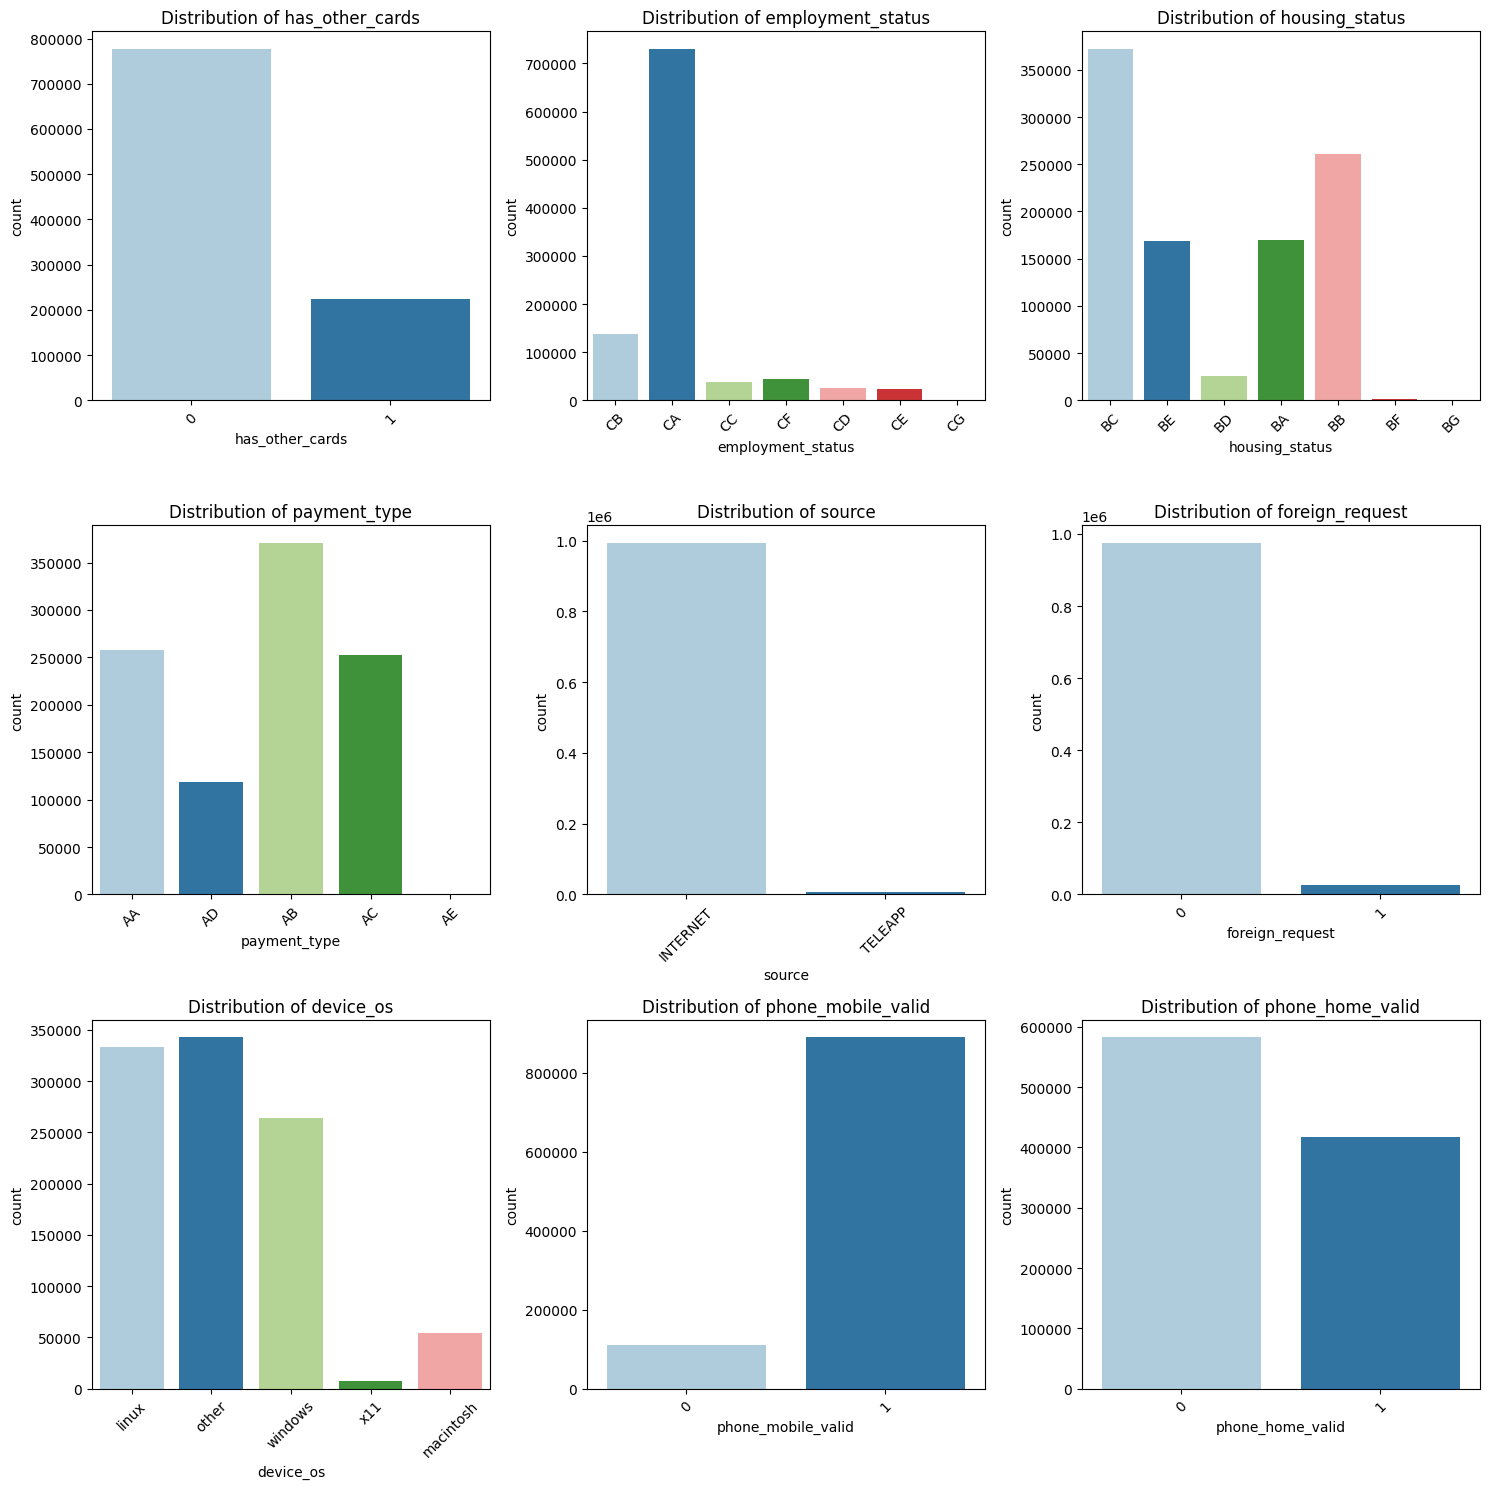

In [25]:
# create a countplots for categorical variables.
fig, axes = plt.subplots(3,3, figsize=(15,15))

# flatten axes
axes_flat = axes.flatten()
palette = sns.color_palette('Paired')

# loop through and plot data using sns.countplot to represent value distributions
for i, variable in enumerate(categorical_variables):

    # get the maxinum colours required by counting unique variables.
    n = base_categorical_subset[variable].nunique()

    # build countplots
    sns.countplot(
        data=base_categorical_subset,
        x=variable,
        hue=variable,
        palette=palette[:n],
        legend=False,
        ax=axes_flat[i]
    )

    # reformat plot elements to enhance readability
    axes_flat[i].tick_params(axis='x', rotation=45)
    axes_flat[i].set_title(f'Distribution of {variable}')

# hide empty plots
for ax in axes_flat[len(categorical_variables):]:
    ax.set_visible(False)

# display the countplots
plt.tight_layout()
plt.show()

**Comment**:

- `has_other_cards`: There're more accounts without other cards than with other cards. Remarks: Fraudsters tend to possess multiple cards for the purpose of illicit transfer of funds.

- `employment_status`: From the count plot above, most records in this data set has an employment status of CA whilst CG has the lowest count.

- `housing_status`: BC has the highest count, BG has the lowest count. Remarks: Fraudsters tend to change location frequently.

- `foreign_request`: Most requests are not foreign, only a small fraction is. Remarks: remote application could be a signal of unusual activities.

- `phone_mobile_valid` and `phone_home_valid`: In this data set, most mobile phone numbers are valid, whilst home phone numbers have slightly more invalid than valid counts. Remarks: Fraudsters may use invalid phone numbers to avoid transaction and identity verification. 

**Q: How are these categorical variables correlated with fraud outcome?**

In [109]:
# calculate the fraud rate per categorical variable option
categorical_fraud_rate = []

# loop through and calculate categorical options fraud rates
for variable in categorical_variables:

    # get fraud rate by categorical option
    summary = (base_categorical_subset.groupby(variable)['fraud_bool']
                 .agg(['count','mean'])
                 .reset_index()
                )
    # standardise columns for concatenation
    summary['variable'] = variable
    summary = summary.rename(columns={
        variable : 'value_options',
        'count' : 'number_of_observations',
        'mean' : 'fraud_rate_decimals',
    })

    # append results to the empty results list
    categorical_fraud_rate.append(summary)

# concatenate results into a single dataframe for plotting
# ignore index to avoid repetition
categorical_fraud_rate_data = pd.concat(categorical_fraud_rate, ignore_index=True)

# convert fraud rates into percentage
categorical_fraud_rate_data['fraud_rate'] = categorical_fraud_rate_data['fraud_rate_decimals'] * 100
categorical_fraud_rate_data = categorical_fraud_rate_data.drop(columns='fraud_rate_decimals')

# reorder columns to enhance readability
categorical_fraud_rate_data = categorical_fraud_data[['variable', 'value_options', 'number_of_observations', 'fraud_rate']]
categorical_fraud_rate_data

,variable,value_options,number_of_observations,fraud_rate
0,has_other_cards,0,777012,1.299594
1,has_other_cards,1,222988,0.417511
2,employment_status,CA,730252,1.218620
3,employment_status,CB,138288,0.689142
4,employment_status,CC,37758,2.468351
5,employment_status,CD,26522,0.377045
6,employment_status,CE,22693,0.233552
7,employment_status,CF,44034,0.193033
8,employment_status,CG,453,1.545254
9,housing_status,BA,169675,3.746574


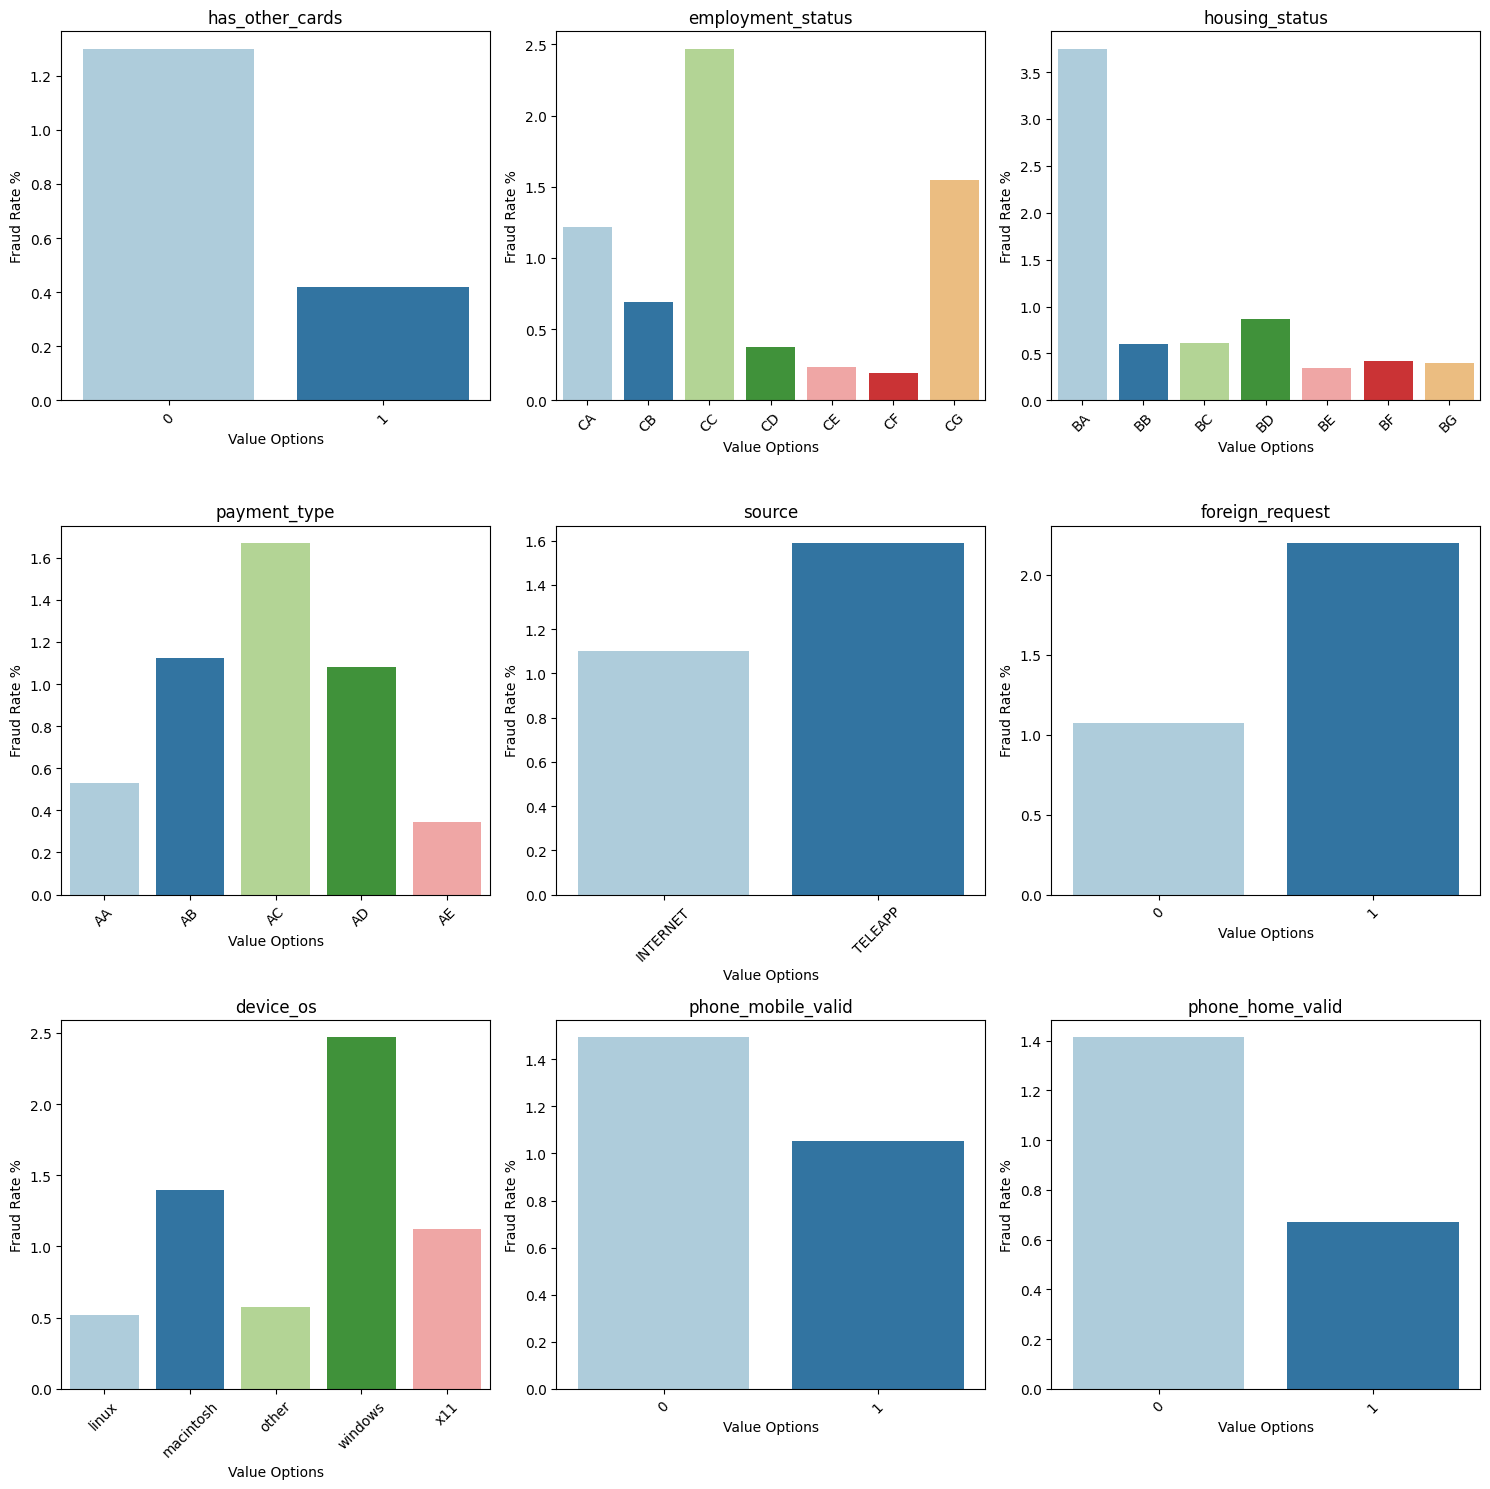

In [110]:
# visualise fraud rate per categorical option
fig, axes = plt.subplots(3,3, figsize=(15,15))

# flatten axes for enumeration, set colour palette
axes_flat = axes.flatten()
colours = sns.color_palette('Paired')

# loop through and build barplots to visually represent fraud rate by value options
for i, variable in enumerate(categorical_variables):

    # subset individual categorical variables and count maximum colours required.
    var_subset = categorical_fraud_rate_data[categorical_fraud_rate_data['variable'] == variable]
    n = var_subset['value_options'].nunique()

    # construct barplots.
    sns.barplot(
        data=var_subset,
        x='value_options',
        y='fraud_rate',
        hue='value_options',
        palette=palette[:n],
        legend=False,
        ax=axes_flat[i]
    )

    # reformat plot elements to enhance readability.
    axes_flat[i].tick_params(axis='x', rotation=45)
    axes_flat[i].set_xlabel('Value Options')
    axes_flat[i].set_ylabel('Fraud Rate %')
    axes_flat[i].set_title(f'{variable}')

# hide empty plots
for ax in axes_flat[len(categorical_variables):]:
    ax.set_visible(False)

# display the barplots
plt.tight_layout()
plt.show()

**Comment**:

Some highlights from these barplots:

- Bank accounts without other cards have higher fraud rate. Remarks: Fraudulent applicants may lack existing credit relationships, suggesting synthetic or newly created identities.
  
- Category CC in `employment_status` shows highest fraud rate. Remarks: Certain employment types appear disproportionately represented in fraud cases. This may reflect increased use of fabricated or unverifiable employment details.

- Category BA in `housing_status` clearly has elevated fraud rate. Remarks: Some housing arrangements may correlate with unstable or unverifiable residency patterns often associated with identity fraud.

- AC and AD `payment_type` show higher fraud concentration. Remarks: Certain funding or payment channels appear more frequently associated with fraudulent onboarding behaviour.

- TELEAPP channel has noticeably higher fraud rate than INTERNET in terms of `source`. Remarks: Application channel is a strong behavioural signal. Non-digital or assisted channels may present higher impersonation or social-engineering risk.

- Foreign requests have roughly double fraud rate. Remarks: Cross-border onboarding activity is a known fraud risk driver and should be considered a high-risk behavioural indicator.

- Invalid or missing phone validation correlates with higher fraud. Remarks: Lack of successful phone verification may indicate fabricated or disposable contact information.

**Conduct Chi-square tests of independence to assess statistical significance.**

$H_0$:

$H_1$: 

**Comment**:


## Investigative analysis

Investigative analysis applies multivariate analysis methodologies to uncover patterns in fraud data.

## Feature engineering

Feature engineering includes transformation, extraction and selection activities to identify the most appropriate independent variables for modelling fraud patterns and predict fraud outcome.

In [104]:
feature_candidates = ['name_email_similarity', 'credit_risk_score', 'proposed_credit_limit']
base_model_subset = base_original[feature_candidates + ['fraud_bool']]
base_model_subset.head()

,name_email_similarity,credit_risk_score,proposed_credit_limit,fraud_bool
0,0.986506,163,1500.0,0
1,0.617426,154,1500.0,0
2,0.996707,89,200.0,0
3,0.475100,90,200.0,0
4,0.842307,91,200.0,0


In [105]:
base_model_subset.tail()

,name_email_similarity,credit_risk_score,proposed_credit_limit,fraud_bool
999995,0.124690,305,1500.0,0
999996,0.824544,235,1000.0,0
999997,0.140891,195,200.0,0
999998,0.002480,148,200.0,0
999999,0.993391,100,200.0,0


Training and Testing Split

## Model selection

In order to meet model governance requirement on explainability and making use of the labelled data set to model fraud patterns and predict bank account fraud, Logistic Regression and XGBoost models are selected for this project.

- *Logistic Regression* is a surpervised learning method that is highly transparent. This dataset has a labelled, binary response variable `fraud_bool` with large quantities of numerical and categorical variables available for feature engineering.

- *XGBoost*: A supervised, ensemble tree-based machine learning technique useful for anomaly detection. The model builds decision trees in sequence with each subsequent tree minimising the residual error of its predecessor.

### Part 1. Logistic Regression

#### Part 1.1 Model Training

#### Part 1.2 Model Evaluation

#### Part 1.3 Interpretation

### Part 2. XGBoost

#### Part 2.1 Model Training

#### Part 2.2 Model Evaluation

#### Part 2.3 Interpretation